In [73]:
import pandas as pd

df = pd.read_csv('data.csv', thousands=',')
df.dropna(how='all', axis=1, inplace=True)
df

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,62.0,58.0,16.0,38.0,32.0,81.0,39.0,28.0,14,53.0
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,52.0,48.0,13.0,31.0,26.0,67.0,33.0,24.0,12,44.0
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,106.0,100.0,27.0,64.0,54.0,138.0,67.0,48.0,25,91.0
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,152.0,142.0,38.0,92.0,77.0,198.0,96.0,69.0,35,130.0


### Train test Split

In [74]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
503,F009739,20502.0,"Yoghurt, soy based, vanilla flavoured, reduced...",309,307,80.7,3.6,0.64,0.8,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
225,F002100,13303.0,"Cake, carrot, commercial, iced",1620,1608,26.0,4.4,0.69,20.4,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN
119,F001120,13201.0,"Biscuit, savoury, from wheat flour, crispbread...",1563,1536,6.2,12.3,1.97,5.6,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN
1045,F007128,18103.0,"Pork, strips, untrimmed, raw",466,466,74.4,22.4,3.58,2.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262,NaN
8,F004210,31302.0,"Ginger, dried, ground",1397,1284,9.9,9.0,1.44,4.2,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,F006291,15202.0,"Oyster, Sydney rock, aquacultured, raw",298,298,79.8,10.6,1.69,2.9,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN
819,F009360,18104.0,"Veal, all cuts, separable fat, raw",1403,1403,52.7,19.4,3.10,29.0,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,NaN
459,F005582,19106.0,"Milk, cow, canned, sweetened, condensed, regular",1362,1362,25.7,8.3,1.30,9.2,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,NaN
1430,F002220,23201.0,"Capers, pickled, canned, drained",126,100,83.8,2.4,0.38,0.9,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN


### Column Filtering
Many columns have a significant percentage of missing values, remove such columns since they might not be able to provide good insights

In [75]:
null_percentage = df.isnull().sum() / df.shape[0] * 100

# Below code gives list of columns having more than 10% null
col_to_drop = null_percentage[null_percentage > 10].keys()

column_filtered_df = df.drop(col_to_drop, axis=1)
print("Columns to Remove: ", col_to_drop)
column_filtered_df

Columns to Remove:  Index(['Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)',
       'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Dextrin \n(g)',
       'Glycerol \n(g)', 'Glycogen \n(g)',
       ...
       'Isoleucine \n(mg)', 'Leucine \n(mg)', 'Lysine \n(mg)',
       'Methionine \n(mg)', 'Phenylalanine \n(mg)', 'Proline \n(mg)',
       'Serine \n(mg)', 'Threonine \n(mg)', 'Tyrosine \n(mg)',
       'Valine \n(mg)'],
      dtype='object', length=206)


,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,C18:3w3 (g),C20:5w3 (mg),C22:5w3 (mg),C22:6w3 (mg),"Total polyunsaturated fatty acids, equated \n(g)","Total long chain omega 3 fatty acids, equated \n(mg)","Total trans fatty acids, imputed \n(mg)",Caffeine \n(mg),Cholesterol \n(mg),Tryptophan \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,0.39,0.00,0.00,0.0,1.39,0.000,0.0,0,0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,0.44,0.00,0.00,0.0,6.69,0.000,0.0,0,0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,0.02,0.00,0.00,0.0,0.12,0.000,0.0,0,0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,0.81,11.06,255.52,0.0,5.03,266.581,0.0,0,0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0.00,0.00,0.00,0.0,1.82,0.000,0.0,0,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,0.00,0.00,0.00,0.0,0.00,0.000,0.0,0,0,35


Drop Columns that have more than 50% Zeroes since they don't provide much utility

In [76]:
df_zero_filtered = column_filtered_df.loc[:, (column_filtered_df == 0).mean() < .5]
df_zero_filtered

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


In [77]:
df_zero_filtered.describe()

,Classification,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1614.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,...,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.00000,1616.000000
mean,18760.882900,845.643564,823.602723,57.143193,12.439233,2.012735,9.495730,1.874876,2.676980,5.890780,...,51.781559,1.160149,1.354121,3.309425,3.727692,1.323156,0.214889,1.669988,175.53367,124.447401
std,5062.646828,702.908930,696.848908,29.319870,11.278716,1.821698,16.903693,5.122109,5.970007,13.361203,...,174.729168,3.503735,6.355711,6.577457,7.750950,4.534164,1.604467,5.217645,479.74001,112.338987
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,15101.000000,306.750000,294.750000,34.700000,2.175000,0.340000,0.400000,0.700000,0.000000,0.000000,...,3.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000
50%,18102.000000,662.500000,658.500000,65.200000,9.350000,1.550000,3.000000,1.200000,0.500000,0.900000,...,17.000000,0.400000,0.400000,0.840000,0.930000,0.240000,0.040000,0.470000,14.88000,97.000000
75%,23107.000000,1214.500000,1154.000000,79.600000,21.900000,3.510000,10.200000,1.800000,3.000000,4.700000,...,39.250000,0.800000,0.870000,3.542500,3.840000,0.922500,0.120000,1.212500,156.41250,211.250000
max,34101.000000,3703.000000,3703.000000,100.000000,85.000000,15.200000,100.000000,99.800000,88.700000,100.000000,...,4031.000000,56.000000,211.000000,92.410000,80.590000,63.760000,54.580000,68.880000,5890.90000,795.000000


In [78]:
df_numeric_only = df_zero_filtered.drop(['Classification', 'Public Food Key', 'Food Name'], axis=1)
df_numeric_only

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
0,1236,1012,8.3,10.8,1.72,6.7,5.8,28.0,4.4,34.4,...,3,2.8,2.85,2.20,2.81,1.00,0.39,1.39,0.0,155
1,1280,1002,10.8,13.4,2.14,14.3,11.8,34.8,7.2,14.9,...,28,38.1,38.14,2.06,2.68,6.24,0.44,6.69,0.0,69
2,1004,579,10.6,4.0,0.64,1.2,3.6,53.1,2.2,27.5,...,6,2.3,2.32,0.62,0.44,0.08,0.02,0.12,0.0,49
3,1389,1118,9.9,6.0,0.96,13.0,5.6,33.9,2.4,31.6,...,25,8.8,8.82,5.49,1.93,3.69,0.81,5.03,0.0,30
4,1344,1009,8.9,12.4,1.98,17.8,6.0,41.9,2.4,8.4,...,0,0.9,0.91,1.03,14.14,1.82,0.00,1.82,0.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,92,80,92.6,1.3,0.20,0.4,0.6,1.6,2.4,2.4,...,19,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,14
1612,77,66,93.8,1.1,0.17,0.4,0.5,1.3,2.0,2.0,...,13,0.6,0.59,0.00,0.00,0.00,0.00,0.00,0.0,12
1613,78,70,94.1,2.2,0.35,0.3,0.6,1.0,1.1,1.1,...,17,0.5,0.52,0.00,0.00,0.00,0.00,0.00,0.0,25
1614,111,100,91.6,3.1,0.50,0.4,0.8,1.4,1.6,1.6,...,17,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.0,35


Fetch only the corresponding columns from the test dataset

In [79]:
test_column_filtered = test[df_numeric_only.columns]
test_column_filtered

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
427,556,556,75.4,17.0,2.41,5.7,1.4,0.0,1.8,1.8,...,3,0.0,0.04,3.47,1.41,0.19,0.07,0.27,253.07,234
1438,146,119,88.5,0.6,0.10,0.0,0.9,3.4,6.2,6.6,...,34,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9
148,1109,1088,34.8,8.6,1.50,3.3,1.4,2.7,3.7,48.5,...,220,0.2,0.23,0.52,1.36,0.80,0.15,0.96,5.87,90
1143,264,257,82.3,7.2,1.15,1.6,1.7,0.8,1.0,4.5,...,0,0.0,0.00,0.72,0.63,0.04,0.01,0.05,55.94,76
612,133,130,91.6,0.6,0.10,0.0,0.4,0.4,7.0,7.3,...,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1217,1204,34.7,7.4,1.26,7.4,2.0,1.7,9.3,47.9,...,13,0.4,0.38,4.40,1.57,0.44,0.06,0.52,148.73,93
653,204,159,85.8,1.1,0.17,0.2,0.4,5.6,6.5,6.8,...,34,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.00,13
502,416,414,79.6,3.6,0.64,3.7,0.7,0.2,8.4,12.6,...,75,0.0,0.05,0.49,1.52,1.08,0.31,1.40,0.00,49
1115,406,406,77.9,20.6,3.30,1.5,1.1,0.0,0.0,0.0,...,0,0.0,0.00,0.38,0.58,0.23,0.02,0.35,5.50,211


We can see that the data has significant outliers, that will bias the outcomes of the model. Removing the rows with outlier values.

In [80]:
import pandas as pd
import numpy as np
from scipy import stats

df_outlier_filtered = df_numeric_only[(np.abs(stats.zscore(df_numeric_only)) < 3).all(axis=1)]
df_outlier_filtered.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


Impute

In [81]:
df_imputed = df_outlier_filtered.fillna(df_outlier_filtered.mean())
df_imputed.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.00000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,690.436609,675.657914,63.71883,12.600975,2.028432,6.117104,1.311478,1.773893,4.128282,13.519805,...,36.486872,0.663316,0.684966,2.270608,2.408230,0.625274,0.086677,0.852138,120.239895,124.206302
std,507.280595,502.482314,24.83551,10.892554,1.739994,8.658042,1.252677,2.750410,7.987821,20.444727,...,63.840860,1.167392,1.206849,3.615873,3.953022,1.101220,0.184816,1.329476,224.258089,107.504181
min,0.000000,0.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,255.000000,55.10000,2.200000,0.370000,0.300000,0.700000,0.000000,0.000000,0.000000,...,3.000000,0.100000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,585.000000,581.000000,69.60000,9.700000,1.610000,2.700000,1.100000,0.400000,0.700000,2.700000,...,17.000000,0.300000,0.350000,0.720000,0.860000,0.200000,0.040000,0.400000,16.720000,100.000000
75%,961.000000,957.000000,81.90000,22.200000,3.570000,8.600000,1.500000,2.700000,4.000000,17.100000,...,37.000000,0.700000,0.750000,2.990000,3.270000,0.730000,0.100000,1.000000,142.300000,211.000000
max,2334.000000,2307.000000,100.00000,43.600000,6.990000,55.500000,16.200000,17.700000,45.500000,81.500000,...,449.000000,10.600000,10.600000,22.160000,26.860000,11.090000,4.060000,12.260000,1600.300000,420.000000


Remove any NULL valued rows from the test Dataset (very few)

In [82]:
test_null_removed = test_column_filtered.dropna()
test_null_removed

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
427,556,556,75.4,17.0,2.41,5.7,1.4,0.0,1.8,1.8,...,3,0.0,0.04,3.47,1.41,0.19,0.07,0.27,253.07,234
1438,146,119,88.5,0.6,0.10,0.0,0.9,3.4,6.2,6.6,...,34,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9
148,1109,1088,34.8,8.6,1.50,3.3,1.4,2.7,3.7,48.5,...,220,0.2,0.23,0.52,1.36,0.80,0.15,0.96,5.87,90
1143,264,257,82.3,7.2,1.15,1.6,1.7,0.8,1.0,4.5,...,0,0.0,0.00,0.72,0.63,0.04,0.01,0.05,55.94,76
612,133,130,91.6,0.6,0.10,0.0,0.4,0.4,7.0,7.3,...,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1217,1204,34.7,7.4,1.26,7.4,2.0,1.7,9.3,47.9,...,13,0.4,0.38,4.40,1.57,0.44,0.06,0.52,148.73,93
653,204,159,85.8,1.1,0.17,0.2,0.4,5.6,6.5,6.8,...,34,0.7,0.70,0.00,0.00,0.00,0.00,0.00,0.00,13
502,416,414,79.6,3.6,0.64,3.7,0.7,0.2,8.4,12.6,...,75,0.0,0.05,0.49,1.52,1.08,0.31,1.40,0.00,49
1115,406,406,77.9,20.6,3.30,1.5,1.1,0.0,0.0,0.0,...,0,0.0,0.00,0.38,0.58,0.23,0.02,0.35,5.50,211


Normalise both Train and Test Data

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(df_imputed.to_numpy())
df_normalised = pd.DataFrame(x, columns=df_imputed.columns)

x = scaler.transform(test_null_removed.to_numpy())
test_normalised = pd.DataFrame(x, columns=test_null_removed.columns)

df_normalised.describe()

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Total sugars (g),"Available carbohydrate, without sugar alcohols \n(g)",...,Dietary folate equivalents \n(ug),Alpha tocopherol \n(mg),Vitamin E \n(mg),"Total saturated fatty acids, equated \n(g)","Total monounsaturated fatty acids, equated \n(g)",C18:2w6 (g),C18:3w3 (g),"Total polyunsaturated fatty acids, equated \n(g)","Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg)
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,...,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,0.295817,0.292873,0.632782,0.289013,0.290191,0.110218,0.080955,0.100220,0.090731,0.165887,...,0.081263,0.062577,0.064619,0.102464,0.089659,0.056382,0.021349,0.069506,0.075136,0.295729
std,0.217344,0.217808,0.251372,0.249829,0.248926,0.156001,0.077326,0.155390,0.175557,0.250856,...,0.142185,0.110131,0.113854,0.163171,0.147171,0.099298,0.045521,0.108440,0.140135,0.255962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116538,0.110533,0.545547,0.050459,0.052933,0.005405,0.043210,0.000000,0.000000,0.000000,...,0.006682,0.009434,0.007547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054762
50%,0.250643,0.251842,0.692308,0.222477,0.230329,0.048649,0.067901,0.022599,0.015385,0.033129,...,0.037862,0.028302,0.033019,0.032491,0.032018,0.018034,0.009852,0.032626,0.010448,0.238095
75%,0.411740,0.414824,0.816802,0.509174,0.510730,0.154955,0.092593,0.152542,0.087912,0.209816,...,0.082405,0.066038,0.070755,0.134928,0.121742,0.065825,0.024631,0.081566,0.088921,0.502381
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

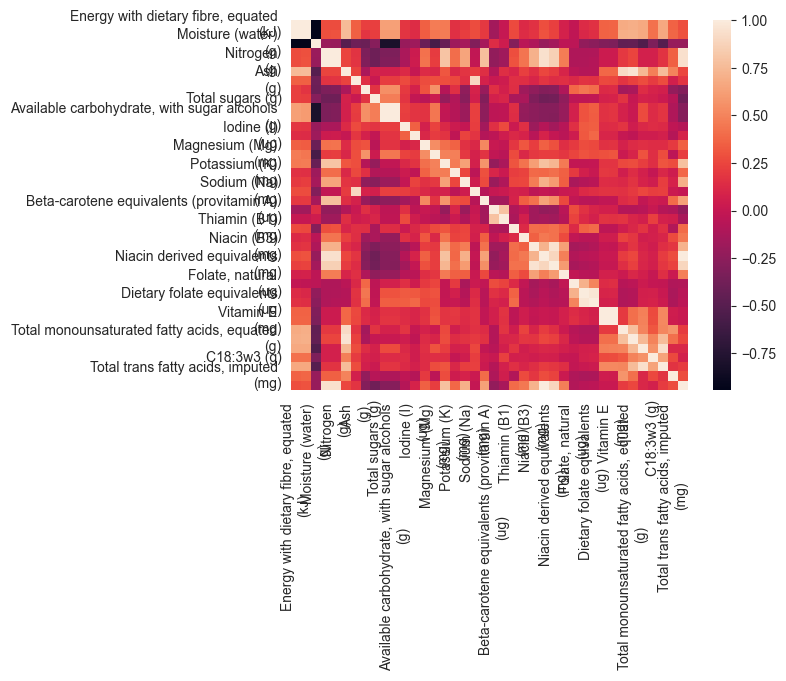

In [84]:
import seaborn as sns
sns.heatmap(df_normalised.corr())

## <span style="color:blue">Insert Columns Here</span>

In [85]:
predict_column = 'Moisture (water) \n(g)'
hide_columns = []

In [86]:
y = df_normalised[predict_column]
x = df_normalised[df_normalised.columns.difference([predict_column] + hide_columns)]

y_test = test_normalised[predict_column]
x_test = test_normalised[test_normalised.columns.difference([predict_column] + hide_columns)]

x

,Alpha tocopherol \n(mg),Ash \n(g),"Available carbohydrate, with sugar alcohols \n(g)","Available carbohydrate, without sugar alcohols \n(g)",Beta-carotene equivalents (provitamin A) \n(ug),C18:2w6 (g),C18:3w3 (g),Calcium (Ca) \n(mg),Dietary folate equivalents \n(ug),"Energy with dietary fibre, equated \n(kJ)",...,Total folates \n(ug),"Total monounsaturated fatty acids, equated \n(g)","Total polyunsaturated fatty acids, equated \n(g)","Total saturated fatty acids, equated \n(g)",Total sugars (g),"Total trans fatty acids, imputed \n(mg)",Tryptophan \n(mg),Vitamin A retinol equivalents \n(ug),Vitamin E \n(mg),Zinc (Zn) \n(mg)
0,0.018868,0.191358,0.914110,0.914110,0.000000,0.005410,0.014778,0.028571,0.055679,0.570694,...,0.089286,0.003351,0.009788,0.008123,0.000000,0.0,0.000000,0.000000,0.023585,0.012453
1,0.000000,0.000000,0.176687,0.176687,0.000000,0.000000,0.000000,0.006122,0.000000,0.098972,...,0.000000,0.000000,0.000000,0.000000,0.316484,0.0,0.000000,0.000000,0.000000,0.001245
2,0.000000,0.018519,0.154601,0.154601,0.000000,0.000902,0.000000,0.022449,0.000000,0.515424,...,0.000000,0.000745,0.000816,0.000903,0.276923,0.0,0.000000,0.000000,0.000000,0.013699
3,0.000000,0.000000,0.025767,0.025767,0.000000,0.000000,0.000000,0.008163,0.000000,0.074550,...,0.000000,0.000000,0.000000,0.000000,0.004396,0.0,0.007143,0.000000,0.000000,0.000000
4,0.000000,0.006173,0.028221,0.028221,0.000000,0.000000,0.000000,0.008163,0.000000,0.065124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007143,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,0.066038,0.037037,0.029448,0.029448,0.102000,0.000000,0.000000,0.051020,0.042316,0.039417,...,0.067857,0.000000,0.000000,0.000000,0.052747,0.0,0.033333,0.057526,0.066038,0.058531
1329,0.056604,0.030864,0.024540,0.024540,0.085143,0.000000,0.000000,0.040816,0.028953,0.032991,...,0.046429,0.000000,0.000000,0.000000,0.043956,0.0,0.028571,0.047939,0.055660,0.046077
1330,0.047170,0.037037,0.013497,0.013497,0.032000,0.000000,0.000000,0.032653,0.037862,0.033419,...,0.060714,0.000000,0.000000,0.000000,0.024176,0.0,0.059524,0.017258,0.049057,0.087173
1331,0.066038,0.049383,0.019632,0.019632,0.038571,0.000000,0.000000,0.046939,0.037862,0.047558,...,0.060714,0.000000,0.000000,0.000000,0.035165,0.0,0.083333,0.021093,0.066038,0.124533


In [87]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

# Fit to the train dataset
lm.fit(x, y)

LinearRegression()

In [88]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x)
mse = mean_squared_error(y, y_pred)

print('MSE for the train dataset', mse)

MSE for the train dataset 0.0003140502084804157


In [89]:
from sklearn.metrics import mean_squared_error

y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE for the test dataset', mse)

MSE for the test dataset 0.047957849788099104


Error is within acceptable bounds, Yay!

Analysing the Most Important Factors in Prediction, and Plotting the received relationships

In [90]:
from matplotlib import pyplot as plt

importance = lm.coef_
# summarize feature importance
importance_df = pd.DataFrame({
    "Column Name": x_test.columns,
    "Importance": importance
})
importance_df

,Column Name,Importance
0,Alpha tocopherol \n(mg),0.192732
1,Ash \n(g),-0.148262
2,"Available carbohydrate, with sugar alcohols \n(g)",-0.474611
3,"Available carbohydrate, without sugar alcohols...",0.145155
4,Beta-carotene equivalents (provitamin A) \n(ug),0.011703
5,C18:2w6 (g),0.021599
6,C18:3w3 (g),0.013149
7,Calcium (Ca) \n(mg),0.008961
8,Dietary folate equivalents \n(ug),3.863272
9,"Energy with dietary fibre, equated \n(kJ)",-1.353076


In [91]:
sorted_importance_df = importance_df.sort_values(by='Importance', key=abs)
sorted_importance_df = sorted_importance_df.tail(10)
sorted_importance_df

,Column Name,Importance
19,Nitrogen \n(g),-0.207057
11,"Fat, total \n(g)",0.223979
2,"Available carbohydrate, with sugar alcohols \n(g)",-0.474611
10,"Energy, without dietary fibre, equated \n(kJ)",0.480648
35,Tryptophan \n(mg),1.068286
18,Niacin derived from tryptophan \n(mg),-1.076270
9,"Energy with dietary fibre, equated \n(kJ)",-1.353076
12,"Folate, natural \n(ug)",1.608065
8,Dietary folate equivalents \n(ug),3.863272
29,Total folates \n(ug),-4.002074


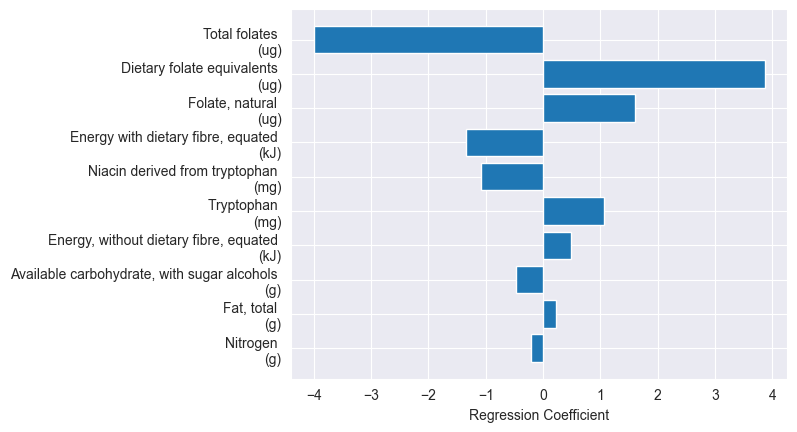

In [92]:
plt.barh(sorted_importance_df["Column Name"], sorted_importance_df["Importance"])
plt.xlabel("Regression Coefficient")
plt.show()

Plotting the relationship between 4 Most Important Features and the Y column

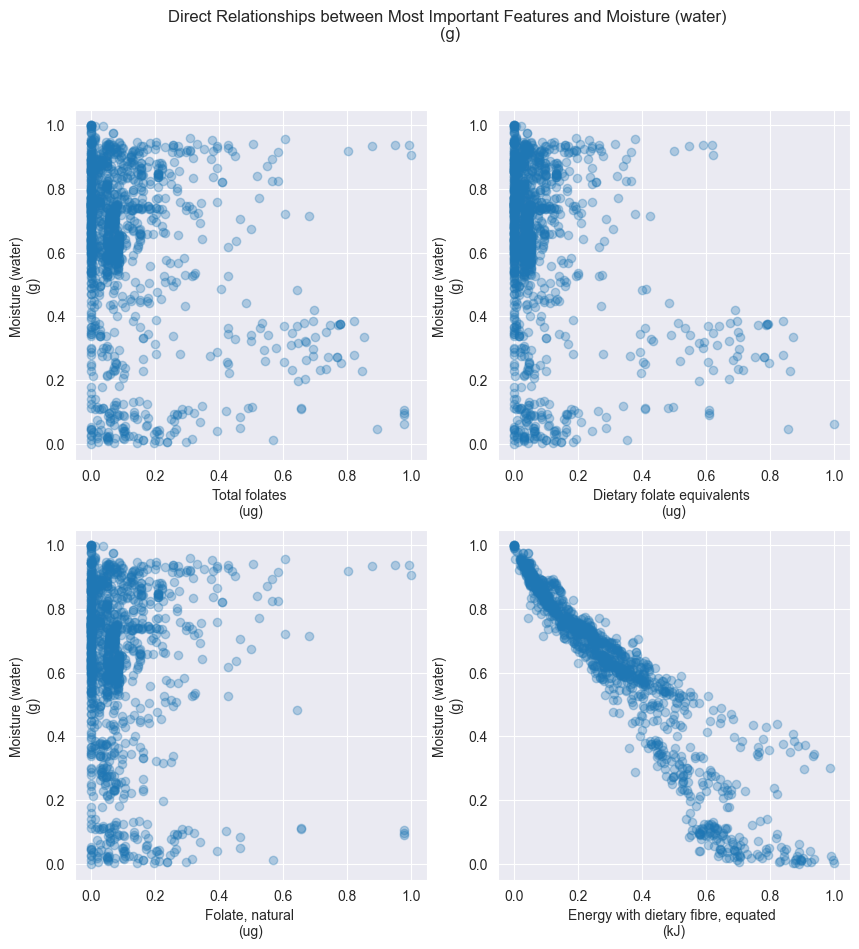

In [93]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle(f'Direct Relationships between Most Important Features and {predict_column}')

for i,ax in enumerate(axs.flat):
    ax.scatter(x[sorted_importance_df["Column Name"].iloc[-i-1]], y, alpha=0.3)
    ax.set_xlabel(sorted_importance_df["Column Name"].iloc[-i-1])
    ax.set_ylabel(predict_column)

plt.show()

Fancy!

<AxesSubplot: >

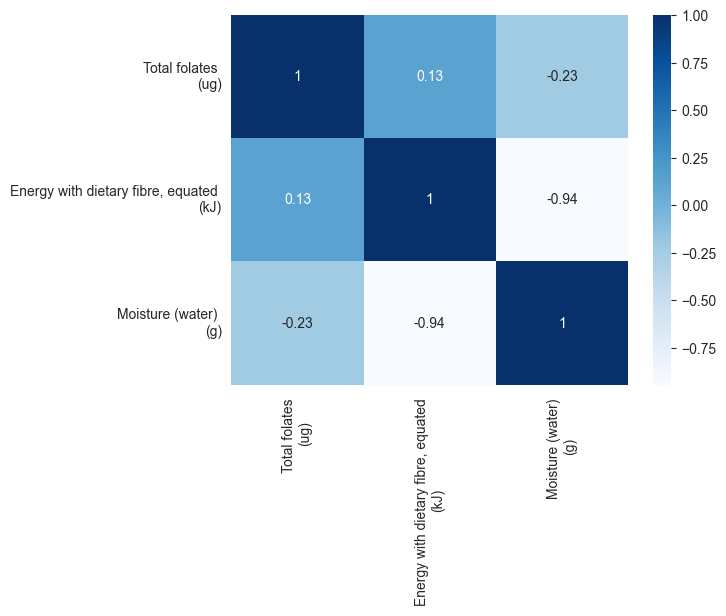

In [94]:
import seaborn as sns
sns.heatmap(df_normalised[['Total folates \n(ug)','Energy with dietary fibre, equated \n(kJ)','Moisture (water) \n(g)']].corr(), cmap="Blues",annot=True)